In [1]:
from prody import *

from pylab import *

ion()

In [2]:
DmbA = parsePDB('2qvb', chain='A')
selection = DmbA.select('resnum 1 to 297')
DmbA_ca = selection.select('name CA')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 2qvb downloaded (2qvb.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2669 atoms and 1 coordinate set(s) were parsed in 0.06s.


In [3]:
gnm = GNM('DmbA')
gnm.buildKirchhoff(DmbA_ca)
gnm.calcModes(n_modes='all')

@> Kirchhoff was built in 0.03s.
@> 293 modes were calculated in 0.22s.


In [4]:
prs_mat, eff, sens = calcPerturbResponse(gnm)

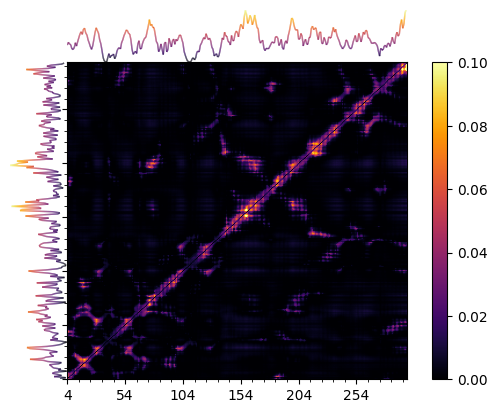

In [5]:

showPerturbResponse(prs_mat, DmbA_ca, 
                    cmap=cm.inferno, 
                    norm=Normalize(0,np.max(prs_mat)/10));

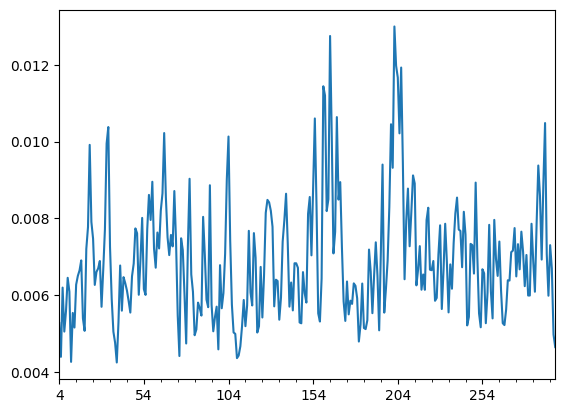

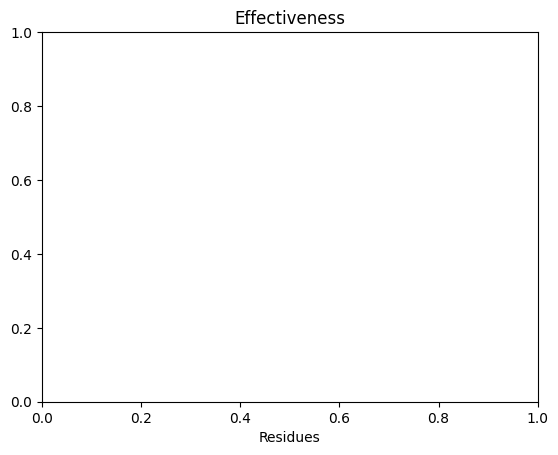

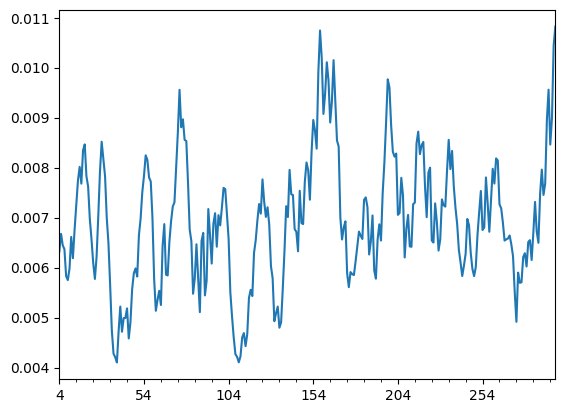

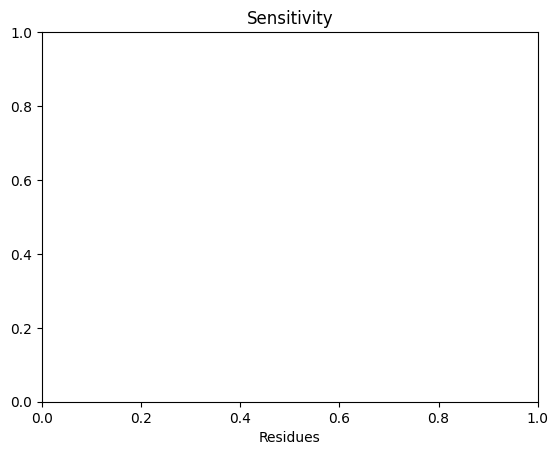

In [6]:
showPerturbResponse(prs_mat, atoms=DmbA_ca, show_matrix=False);

In [7]:

prs_mat, effectiveness, sensitivity = calcPerturbResponse(gnm)

In [8]:
effectiveness_cutoff = np.percentile(effectiveness, 100) 
sensitivity_cutoff = np.percentile(sensitivity, 100)

effective_residues = [residue for residue, value in zip(DmbA_ca.getResnames(), effectiveness) if value < effectiveness_cutoff]
sensitive_residues = [residue for residue, value in zip(DmbA_ca.getResnames(), sensitivity) if value < sensitivity_cutoff]

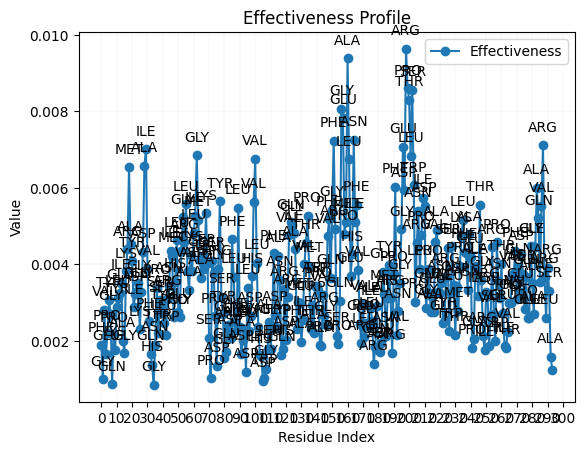

In [9]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()


ax.plot(effectiveness, label='Effectiveness', marker='o')




for i, value in enumerate(effective_residues):
    ax.annotate(value, (i, effectiveness[i]), textcoords="offset points", xytext=(0,10), ha='center')

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x), max(x)+300, 10))

ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Effectiveness Profile')

plt.show()

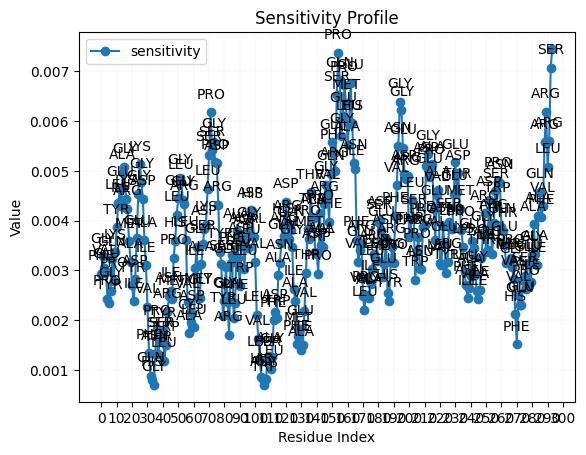

In [10]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()


ax.plot(sensitivity, label='sensitivity', marker='o')




for i, value in enumerate(sensitive_residues):
    ax.annotate(value, (i, sensitivity[i]), textcoords="offset points", xytext=(0,10), ha='center')

grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x), max(x)+300, 10))


ax.legend()
ax.set_xlabel('Residue Index')
ax.set_ylabel('Value')
ax.set_title('Sensitivity Profile')


plt.show()

In [11]:
writePDB('2qvb_effectiveness.pdb', DmbA_ca, beta=eff)

'2qvb_effectiveness.pdb'

In [12]:
writePDB('2qvb_sensitivity.pdb', DmbA_ca, beta=sens)

'2qvb_sensitivity.pdb'

In [13]:
for (resname, resnum), value in zip(resnames_and_nums, effectiveness):
    print(f"Residue {resnum} ({resname}): Effectiveness = {value}")

for (resname, resnum), value in zip(resnames_and_nums, sensitivity):
    print(f"Residue {resnum} ({resname}): Sensitivity = {value}")

NameError: name 'resnames_and_nums' is not defined